<a href="https://colab.research.google.com/github/sarahejaz/gonotes/blob/main/video2text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DeepSpeech Model


Reference:
https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/MozillaDeepSpeech.ipynb#scrollTo=fZwM0GtmA7mX

In [3]:
''' -*- DeepSpeech Model version 0.6.1 -*- '''

import os
from os.path import exists, join, basename, splitext

''' -*- importing Deep Speech Model if it does not already exist -*- '''

if not exists('deepspeech-0.6.1-models'):
  !apt-get install -qq sox
  !pip install -q deepspeech-gpu==0.6.1 youtube-dl
  !wget https://github.com/mozilla/DeepSpeech/releases/download/v0.6.1/deepspeech-0.6.1-models.tar.gz
  !tar xvfz deepspeech-0.6.1-models.tar.gz
  
''' -*- importing Youtube Video Display  -*- '''

from IPython.display import YouTubeVideo

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2-3ubuntu0.18.04.1) ...
Selecting previously un

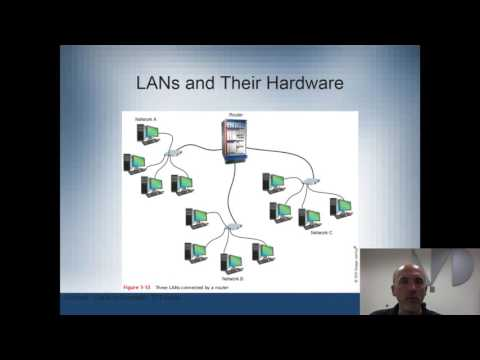

In [4]:
''' -*- testing YouTube Display  -*- '''

YOUTUBE_ID = '2xbAiKyTveU'


YouTubeVideo(YOUTUBE_ID)

Extracting Audio From Video and then converting it to text:

In [5]:
''' -*- executing Deep Speech Model -*- '''
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav >> Inference.txt

[youtube] 2xbAiKyTveU: Downloading webpage
[youtube] 2xbAiKyTveU: Downloading MPD manifest
[dashsegments] Total fragments: 41
[download] Destination: test.webm
[download] 100% of 6.04MiB in 00:06
[ffmpeg] Destination: test.wav
Deleting original file test.webm (pass -k to keep)
Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2021-01-01 18:43:49.050448: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-01-01 18:43:49.051766: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2021-01-01 18:43:49.106005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-01 18:43:49.106566: I tensorflow/core/common_runti

#Pip Punctuator

Reference: https://pypi.org/project/punctuator/

In [6]:
!pip install punctuator

     |████████████████████████████████| 1.4MB 10.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp36-none-any.whl size=9693 sha256=b84adf6a3aae390c1932e0f111710c3c996758f125ce10389c5c56905085face
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for punctuator: filename=punctuator-0.9.6-cp36-none-any.whl size=25154 sha256=006cf2c504822ebf401e466216df181d3f31bbd9f6f8d9314a7af2d545a21a89
  Stored in directory: /root/.cache/pip/wheels/9a/4b/83/024d41a639f2945705721ebc0b9c596880d492a487925f941a
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434674 sha256=ba8e8dc9716c1204e465cf90d7963fb1729ee2a5243dc28490243cf0a96b50b8
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully buil

In [7]:
!pip install gdown

In [8]:
''' -*- importing gdown to download the Demo Europarl model -*- '''
import gdown

url = 'https://drive.google.com/uc?id=0B7BsN5f2F1fZd1Q0aXlrUDhDbnM'
output = 'Demo-Europarl-EN.pcl'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=0B7BsN5f2F1fZd1Q0aXlrUDhDbnM
To: /content/Demo-Europarl-EN.pcl
144MB [00:01, 106MB/s] 


'Demo-Europarl-EN.pcl'

In [9]:
''' -*- punctuating the raw text output from Deep Speech using Pip Punctuator -*- '''

from punctuator import Punctuator
f = open('Inference.txt', "r")
lines = f.readline()
f.close()
p = Punctuator('Demo-Europarl-EN.pcl')
punctLines=p.punctuate(lines)
print(punctLines)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Morning, one computes networking discussion and professor canard were to go to chapter. One of the text which is introduction to networking were talking about what the purpose of the network is for mainly the different types of devices, as well as a dressing types of network that you have and their applications we licences and network in vigil setout the course so to her network service. Those. You might also hear the term application to proposes a network that share different types of what we call resources or resource could be something as simple as a file or a printer. It could be. A website could be an entire earpieces, so the willis, the tar resources well as application under the hood mightiest service refuter into the servants with might say, protocol trident types of applications. It all see disgust in the text, clientele and peter being the two main types which is of the machines. Well, so it cliverer as you'll see the listing at the double type of networks that we see to day 

In [10]:
punctLines
file1 = open("PunctuatedText.txt","w+")

In [11]:
file1.write(punctLines)

5967

#NLTK Preprocessing

Reference: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [14]:
''' -*- Function for word tokenization and lemmatization -*- '''
def lemmSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemm_sentence=[]
    for word in token_words:
        lemm_sentence.append(wordnet_lemmatizer.lemmatize(word))
        lemm_sentence.append(" ")
    return "".join(lemm_sentence)


#Pip Sumy Summarizer

Reference: https://pypi.org/project/sumy/

In [15]:
''' -*- Installing the pip Sumy summarizer -*- '''

! pip install git+git://github.com/miso-belica/sumy.git

  Cloning git://github.com/miso-belica/sumy.git to /tmp/pip-req-build-ooji6uz4
  Running command git clone -q git://github.com/miso-belica/sumy.git /tmp/pip-req-build-ooji6uz4
     |████████████████████████████████| 10.1MB 12.2MB/s 
  Created wheel for sumy: filename=sumy-0.8.1-py2.py3-none-any.whl size=87940 sha256=c2bfb7e42339c034e6d679b3927aeed1ea3c412abfa89e24e172487c028e8c8d
  Stored in directory: /tmp/pip-ephem-wheel-cache-c62e1oku/wheels/ca/d7/7c/6e918e8342b863a32773e60f127b2714872821e5604936c0ea
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21683 sha256=937215f2307c7174940ace87c6608ba4ca55b04273a2c3a42bec61fc9fd8cb5e
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=dcbbe2c44f6d09d885413585965d2c27d03648fc68b583695f554f0847338f64
  Stored in directory: /root/.cache/pip/wheels/33/4e/

In [16]:
''' -*- Implementing the Pip Sumy Summarizer -*-'''

from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


LANGUAGE = "english"
SENTENCES_COUNT = 10

file2 = open("SummarizedText.txt","w+")

if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/Automatic_summarization"
    #parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
    # or for plain text files
    parser = PlaintextParser.from_file("PunctuatedText.txt", Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)
    sentences=[]
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        sentences.append(sentence)
        file2.write(str(sentence))
        file2.write('\n')

In [17]:
pLines=[punctLines]
print(pLines)
lines_list = nltk.tokenize.sent_tokenize(punctLines)
print(lines_list)

["Morning, one computes networking discussion and professor canard were to go to chapter. One of the text which is introduction to networking were talking about what the purpose of the network is for mainly the different types of devices, as well as a dressing types of network that you have and their applications we licences and network in vigil setout the course so to her network service. Those. You might also hear the term application to proposes a network that share different types of what we call resources or resource could be something as simple as a file or a printer. It could be. A website could be an entire earpieces, so the willis, the tar resources well as application under the hood mightiest service refuter into the servants with might say, protocol trident types of applications. It all see disgust in the text, clientele and peter being the two main types which is of the machines. Well, so it cliverer as you'll see the listing at the double type of networks that we see to da

#Count Vectorizer

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [18]:
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np

In [19]:
''' -*- Lemmatizing the Text in order to find the root word -*- '''


lemm_file= open("LemmatizedText.txt","w+")
final_lines=[]
sentences=""
for line in lines_list:
    lemm_sentence=lemmSentence(line)
    lemm_file.write(lemm_sentence)
    final_lines.append([lemm_sentence])
    sentences+=lemm_sentence
lemm_file.close()


''' -*- Vectorizing the Text using the Count Vectorizer -*- '''
vectorizer = CountVectorizer(stop_words='english')
results = vectorizer.fit_transform([sentences])
print(results.toarray())
feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(results.toarray()).flatten()[::-1]
n = 15
words = feature_array[tfidf_sorting][:n]
result=np.sort(results.toarray()).flatten()[::-1]
count= result[:n]
print(words,count)
print(final_lines)

[[ 1  1  1  1  1 16  2  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1
   1  3  1  1  1  1  3  2  1  1  1  1  1  1  2  2  1  3  1  2  1  1  2  1
   1  1  1  1  1  1  8  2  1  5  1  2  1  1  2  1  1  1  1  2  1  1  1  1
   1  2  1  1  1  1  3  1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  1  1
   1  4  1  1  2  1  1  2  1  1  2  1  1  2  2  1  1  4  1  1  1  9  1  1
   1  1  1  1  1  1  3  1  1  2  4  5  2  2  1  1  1  1  1  1  1  2  3  2
   1  1  1  1  1  3  1  1  1  4  1 17  3  1  1  1  2  1  1  7  1  1  1  1
   1  1  1  1  1  1  1  1  2  1  1  1  5  1  2  1  3  1  1  1  1  1  1  1
   3  5  1  1  1  1  1  1  1  3  1  1  1  1  4  1  1  1  1  1  1  9  1  1
   1  1  2  1  1  1  2  1  2  1  2  1  1  3  1  1  1  1  1  2  2  1  1  2
   2  1  1  1  2  1  1  1  1  1  1  9  1  1  1  2  1  1  1  1  1  1  1  3
   1  1  1  1  1  1  1]]
['network' 'application' 'layer' 'type' 'service' 'device' 'particular'
 'machine' 'protocol' 'different' 'resource' 'lot' 'need' 'job' 'separate'] [17 16  9  9 

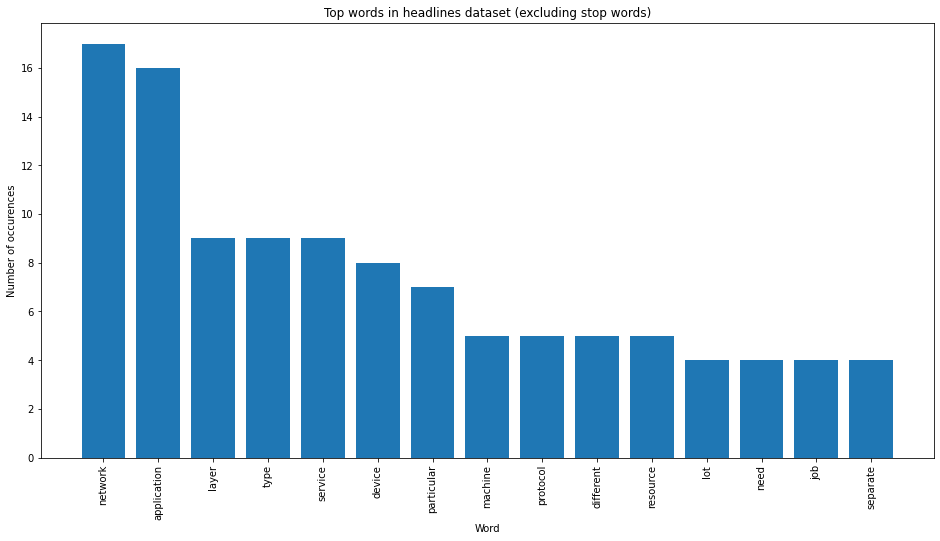

In [20]:
''' -*- Plotting the results from the Count Vectorizer -*- '''

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)),count)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

#LSA Centroid Method

Reference: https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [22]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = final_lines
small_document_term_matrix = small_count_vectorizer.fit_transform(lines_list)
n_topics = 8
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [23]:
''' -*- Printing Outputs from LSA to check the results -*- '''

#print(lsa_topic_matrix)

' -*- Printing Outputs from LSA to check the results -*- '

In [24]:
sort_lsa = np.argsort(lsa_topic_matrix)
#print(sort_lsa)

#Flask Front End

In [25]:
!pip install flask-ngrok

In [27]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import Flask, render_template  

app = Flask(__name__, template_folder='drive/MyDrive/FYP/templates')
run_with_ngrok(app)   #starts ngrok when the app is run 

#app = Flask(__name__)

@app.route("/")
def home():
    return render_template("index.html")
    
@app.route("/transcription")
def transcription():
    return render_template("transcription.html", punctLines=punctLines)
    
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b3a71c68c15f.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [01/Jan/2021 18:53:28] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jan/2021 18:53:29] "GET /favicon.ico HTTP/1.1" 404 -
